## Data Understanding and Data Visulization

In [167]:
# Dependencies and setup
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as sts

In [102]:
#setting background of figure 
plt.style.use('ggplot')
#Set Fonts/Plot Style
rcParams['figure.figsize'] = [15.0, 10.0]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 100
rcParams['font.size'] = 20
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

In [103]:
# Reading the cleaned saved data 
rent_df=pd.read_csv('Resources/Cleaned_data/cleaned_rent_data.csv')

In [104]:
#Looking top rows
rent_df.head()

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age
0,Karima Germany,1951-05-23,1192,92154,2011-11-01,1321.0,1321.0,71
1,Agustina Spargo,1900-01-01,21,92111,2011-09-06,2289.0,2289.0,122
2,Lucilla Broderick,1900-01-01,1474,92159,2011-11-01,1439.0,1439.0,122
3,Russ Mchale,1977-04-20,2015,92137,2012-07-01,1744.0,1744.0,45
4,Carmelita Ritzer,1969-03-09,311,92136,2011-02-01,1471.0,1471.0,53


In [106]:
rent_df['dob']=pd.to_datetime(rent_df['dob']).dt.date
rent_df['paymentDate']=pd.to_datetime(rent_df['paymentDate']).dt.date

## Data Understanding

## A. What’s the relation between person and address?
### 1. Can one person live in more than one address? 



In [23]:
#total unique names
name=rent_df.name.nunique()
name

1989

In [24]:
#total unique houses
tot_house=rent_df.houseID.nunique()
tot_house

2475

In [25]:
# Grouping by name and date of birth to see how many person live in different address
same_person=rent_df.groupby(["name", 'dob']).agg({'houseID': 'nunique',
                                                'paymentAmount': lambda x : x.unique(),
                                                'rentAmount': 'nunique'}).reset_index()
same_person

,name,dob,houseID,paymentAmount,rentAmount
0,Aaron Huston,1900-01-01,1,1720.0,1
1,Abbey Kluth,1900-01-01,1,"[2023.0, 1861.0, 1780.0, 1619.0]",1
2,Abe Prophet,2014-02-08,1,"[1143.0, -171.45]",1
3,Abel Emmett,1974-01-17,1,1802.0,1
4,Abraham Maggi,1900-01-01,1,"[1269.0, 1395.0]",1
...,...,...,...,...,...
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2
1985,Zoila Buth,1960-11-18,1,825.0,1
1986,Zoila Faler,1966-11-20,1,1396.0,1
1987,Zola Howley,1984-02-04,2,"[1021.0, 1497.0, 0.0]",2


In [26]:
# Filtering person living in less than one address using houseID
diff_house=same_person[same_person['houseID']>1]
diff_house

,name,dob,houseID,paymentAmount,rentAmount
6,Adaline Santos,1986-08-22,4,"[1279.0, 1446.0, 948.0, 1531.0, 0.0]",4
9,Adeline Hodgkinson,1900-01-01,2,"[0.0, 1241.0, 1720.0, 1365.0, 1892.0]",2
12,Agatha Brindley,1986-05-06,2,"[1059.0, 0.0, 1718.0, -158.85]",2
19,Aida Kittel,1972-11-03,2,"[875.0, -119.4, 2477.0, 915.0, 796.0, 995.0, 2...",2
24,Alba Resnick,1983-09-07,2,"[666.0, 732.0, 1585.0]",2
...,...,...,...,...,...
1970,Yevette Vickers,1900-01-01,2,"[1180.0, 1693.0]",2
1973,Yolanda Cowboy,1900-01-01,2,"[1223.0, 1557.0, -183.45, 1416.0, 1345.0]",2
1976,Yuki Uhler,1962-08-19,2,"[1482.0, 2172.0]",2
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2


## 392 people have multiple address with Adaline Santos with 4 different address
#### (Under the assumption that if the person dob is missing(1900-01-01), then considering the same person with this dob)

In [107]:
# Filtering the person with missing date of birth
house=diff_house.loc[diff_house["dob"].apply(lambda x : x.year)!=1900]
house

,name,dob,houseID,paymentAmount,rentAmount
6,Adaline Santos,1986-08-22,4,"[1279.0, 1446.0, 948.0, 1531.0, 0.0]",4
12,Agatha Brindley,1986-05-06,2,"[1059.0, 0.0, 1718.0, -158.85]",2
19,Aida Kittel,1972-11-03,2,"[875.0, -119.4, 2477.0, 915.0, 796.0, 995.0, 2...",2
24,Alba Resnick,1983-09-07,2,"[666.0, 732.0, 1585.0]",2
32,Alethia Klick,1968-04-06,2,"[1187.0, 1857.0]",2
...,...,...,...,...,...
1962,Xiomara Mcnabb,1968-01-20,2,"[1227.0, 1970.0, 2167.0, 1349.0, 0.0]",2
1967,Yer Avey,1981-08-05,2,"[1308.0, 1009.0, -196.2, 0.0]",2
1976,Yuki Uhler,1962-08-19,2,"[1482.0, 2172.0]",2
1984,Zofia Knoles,1999-12-17,2,"[1495.0, 0.0, 1792.0]",2


## Ans: 207 people have multiple address with Adaline Santos with 4 different address (Identified using both name and date of birth)


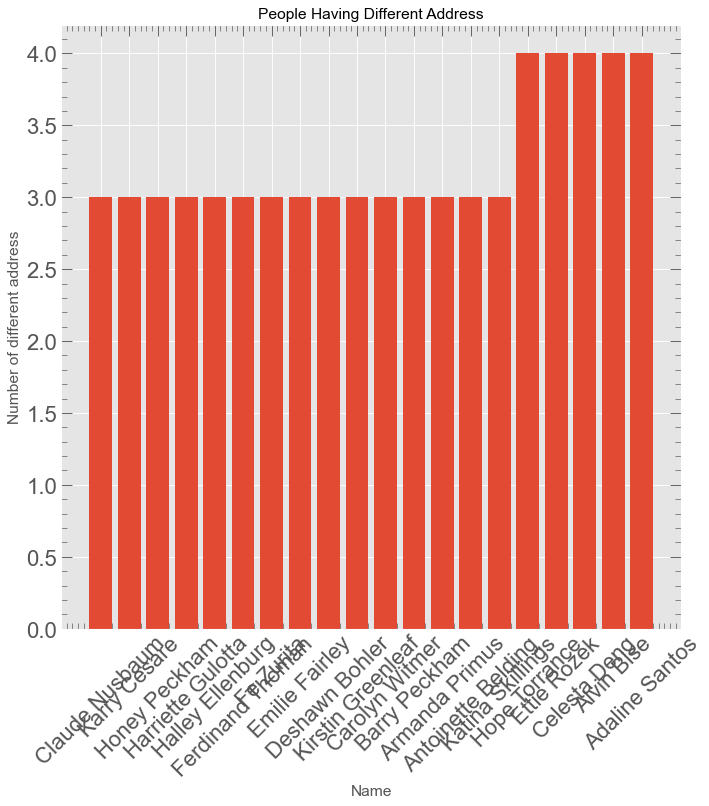

In [108]:
# Arranging the top 20 person with maximum address 
top=house.nlargest(20, 'houseID')
top.sort_values('houseID', inplace=True)
#Bar plot of person having different address
fig, ax = plt.subplots(figsize = (10,10))
ax.bar(top['name'],top['houseID'])
ax.set_xlabel("Name", size = 14)
ax.set_ylabel("Number of different address", size = 14)
ax.set_title("People Having Different Address", size = 14)
plt.xticks(rotation = 45)
plt.show()


### 2. Can one address have more than one person.


In [30]:
#Using groupby on houseID
h_rent=rent_df.groupby(["houseID"]).agg({'name': 'nunique',
                        'paymentDate': lambda x : x.unique(),
                        'paymentAmount': 'nunique',
                        'rentAmount': 'nunique'}).reset_index()
h_rent

,houseID,name,paymentDate,paymentAmount,rentAmount
0,1,1,"[2012-04-01, 2010-07-01, 2011-03-01, 2011-12-0...",1,1
1,2,1,"[2010-11-09, 2011-07-17, 2011-02-13, 2011-11-0...",4,1
2,3,1,"[2011-09-01, 2011-04-01, 2011-03-01, 2012-07-0...",1,1
3,4,1,"[2011-02-02, 2011-07-01, 2010-09-01, 2011-11-0...",2,1
4,5,1,"[2011-05-05, 2011-01-01, 2011-09-11, 2010-04-0...",2,1
...,...,...,...,...,...
2470,2471,1,"[2011-10-01, 2010-03-01, 2011-06-01, 2011-03-0...",1,1
2471,2472,1,"[2011-12-01, 2010-06-01, 2011-03-01, 2011-10-0...",1,1
2472,2473,1,"[2010-10-01, 2010-07-01, 2010-04-01, 2011-01-0...",1,1
2473,2474,1,"[2011-08-01, 2011-04-01, 2011-11-01, 2012-03-0...",2,1


In [109]:
#Value counts on name
h_rent.name.value_counts()

1    2475
Name: name, dtype: int64

### Ans: In one address, only one person is living.

## 2. Can one address have different amount of rent? Payment?


In [32]:
#Groupby using houseID
diff_rent=rent_df.groupby(["houseID"]).agg({'name': lambda x : x.unique(),'paymentDate': lambda x : x.unique(),
                        'paymentAmount': 'nunique',
                        'rentAmount': 'nunique'}).reset_index()
diff_rent

,houseID,name,paymentDate,paymentAmount,rentAmount
0,1,Aaron Huston,"[2012-04-01, 2010-07-01, 2011-03-01, 2011-12-0...",1,1
1,2,Abbey Kluth,"[2010-11-09, 2011-07-17, 2011-02-13, 2011-11-0...",4,1
2,3,Abel Emmett,"[2011-09-01, 2011-04-01, 2011-03-01, 2012-07-0...",1,1
3,4,Abe Prophet,"[2011-02-02, 2011-07-01, 2010-09-01, 2011-11-0...",2,1
4,5,Abraham Maggi,"[2011-05-05, 2011-01-01, 2011-09-11, 2010-04-0...",2,1
...,...,...,...,...,...
2470,2471,Zoila Buth,"[2011-10-01, 2010-03-01, 2011-06-01, 2011-03-0...",1,1
2471,2472,Zoila Faler,"[2011-12-01, 2010-06-01, 2011-03-01, 2011-10-0...",1,1
2472,2473,Zola Howley,"[2010-10-01, 2010-07-01, 2010-04-01, 2011-01-0...",1,1
2473,2474,Zola Howley,"[2011-08-01, 2011-04-01, 2011-11-01, 2012-03-0...",2,1


In [33]:
#Number of different rent
diff_rent['rentAmount'].value_counts()

1    2475
Name: rentAmount, dtype: int64

### Ans: One address has only one rent amount.

In [34]:
#Number of different payment
diff_rent['paymentAmount'].value_counts()

1    1160
2     784
3     286
4     165
5      66
6      14
Name: paymentAmount, dtype: int64

### Ans: One address can have differnt payment amount with 6 address have 14 differnt payment amount.

### B. We have a hypothesis that tenant’s age is related to the rent they pay.
### 1. Make a plot to check whether the hypothesis seems right?



In [110]:
# Selecting the appropriate age with filtering dob of 1900-01-01
df_age=rent_df[(rent_df['age']>1) & (rent_df['age']<100)]
df_age

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age
0,Karima Germany,1951-05-23,1192,92154,2011-11-01,1321.0,1321.0,71
3,Russ Mchale,1977-04-20,2015,92137,2012-07-01,1744.0,1744.0,45
4,Carmelita Ritzer,1969-03-09,311,92136,2011-02-01,1471.0,1471.0,53
5,Clifton Ellwood,1993-11-02,430,92103,2011-11-01,1233.0,1233.0,29
8,Lashawn Rotella,1985-12-05,1336,92190,2011-07-01,1930.0,1930.0,37
...,...,...,...,...,...,...,...,...
59805,Freddie Bridger,1965-03-06,804,92145,2011-04-01,1142.0,1142.0,57
59807,Marylouise Mott,1994-03-21,1633,92159,2010-07-01,1342.0,1342.0,28
59808,Jennell Buchholtz,1983-05-21,1095,92196,2010-10-01,1744.0,1744.0,39
59809,Berneice Power,1984-08-24,196,92123,2010-04-01,1756.0,1756.0,38


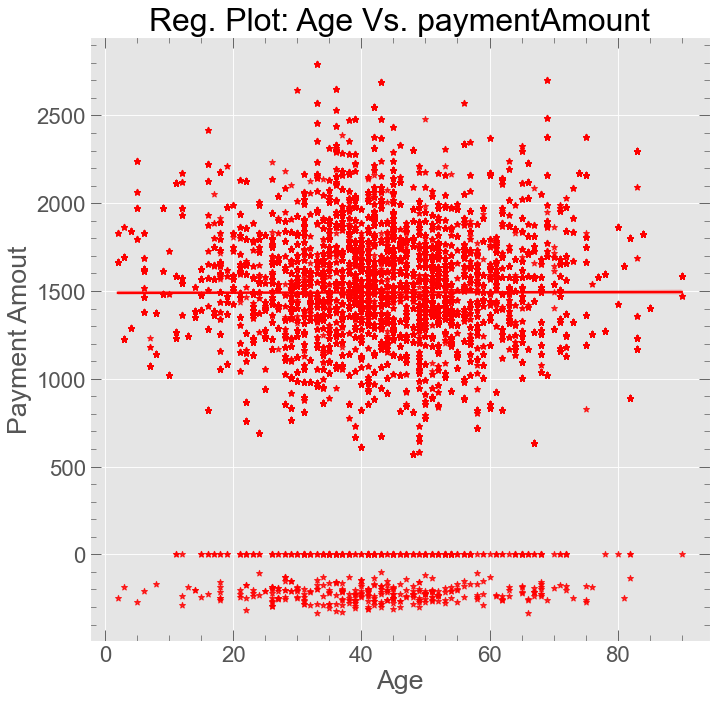

In [122]:
# Plotting age versus paymentAmount
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x='age', y='paymentAmount',
           data=df_age,scatter_kws={'s':30},color='r',marker="*",ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Payment Amout')
ax.set_title('Reg. Plot: Age Vs. paymentAmount')

plt.show()

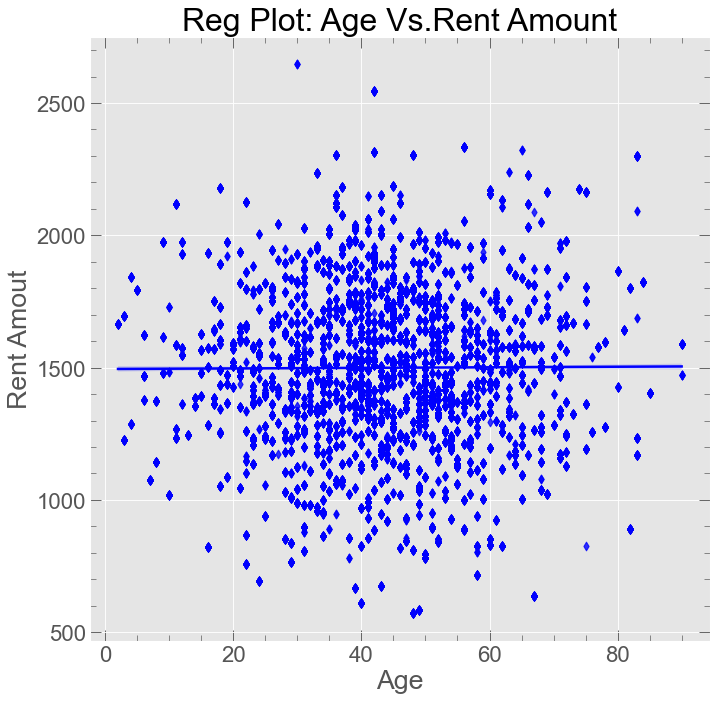

In [123]:
#Plotting age and rent amount
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x='age', y='rentAmount',
           data=df_age,scatter_kws={'s':30},color='b',marker="d",ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Rent Amout')
ax.set_title('Reg Plot: Age Vs.Rent Amount')
#ax.legend( loc='upper right',labels='paymentAmount')

plt.show()

## Grouping by age and calculating the mean rent amount and payment amount.

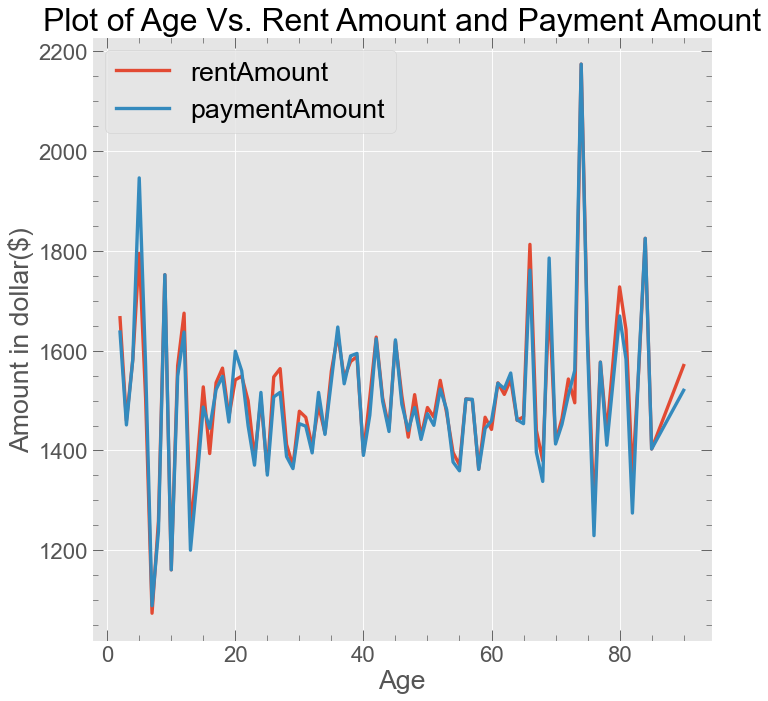

In [198]:
#Using groupby method
date=df_age.groupby(['age'])["rentAmount", "paymentAmount"].mean().reset_index()
#Plotting both rent amount and payment amount with age
fig, ax = plt.subplots(figsize=(10,10))
date.plot(x="age", y=["rentAmount", "paymentAmount"], linewidth=3,ax=ax)
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Age")
plt.title("Plot of Age Vs. Rent Amount and Payment Amount")
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.show()

### From the graph, one can see that there is no lrelationship between age and rent amount and payment amount.
### As the curve looks relatively constant with up and down in some age.

### Grouping the age by binning

In [173]:
bins=[0,20, 40, 60, 80, 100]
labels=['0-20', '20-40', '40-60', '60-80', '80-100']
#using pandas pd.cut
df_age["ageRange"]=pd.cut(df_age["age"], bins, labels=labels)
df_age

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age,ageRange
0,Karima Germany,1951-05-23,1192,92154,2011-11-01,1321.0,1321.0,71,60-80
3,Russ Mchale,1977-04-20,2015,92137,2012-07-01,1744.0,1744.0,45,40-60
4,Carmelita Ritzer,1969-03-09,311,92136,2011-02-01,1471.0,1471.0,53,40-60
5,Clifton Ellwood,1993-11-02,430,92103,2011-11-01,1233.0,1233.0,29,20-40
8,Lashawn Rotella,1985-12-05,1336,92190,2011-07-01,1930.0,1930.0,37,20-40
...,...,...,...,...,...,...,...,...,...
59805,Freddie Bridger,1965-03-06,804,92145,2011-04-01,1142.0,1142.0,57,40-60
59807,Marylouise Mott,1994-03-21,1633,92159,2010-07-01,1342.0,1342.0,28,20-40
59808,Jennell Buchholtz,1983-05-21,1095,92196,2010-10-01,1744.0,1744.0,39,20-40
59809,Berneice Power,1984-08-24,196,92123,2010-04-01,1756.0,1756.0,38,20-40


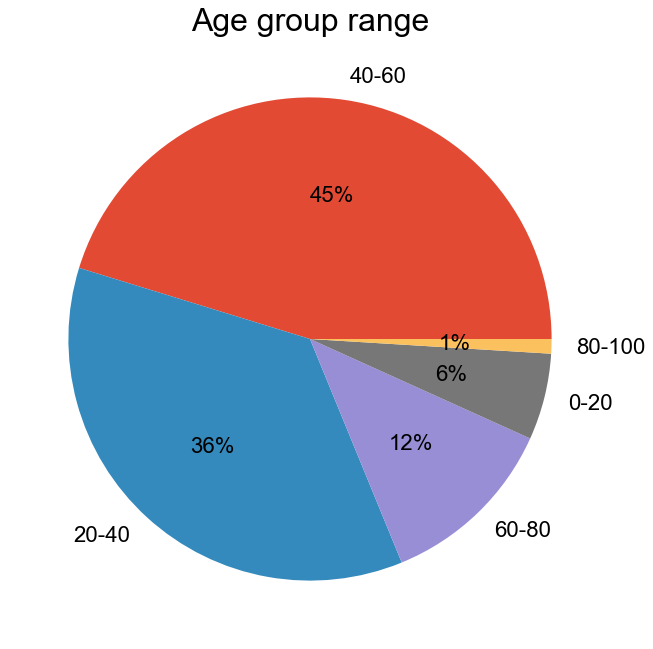

In [176]:
# Pie plot of different payment situations
plt.figure(figsize=(10,10))
df_age['ageRange'].value_counts().plot(kind='pie', autopct='%1.0f%%', label='')
plt.title("Age group range")
plt.show()

### Bar Plot of Age Range and Rent and Payment Amount

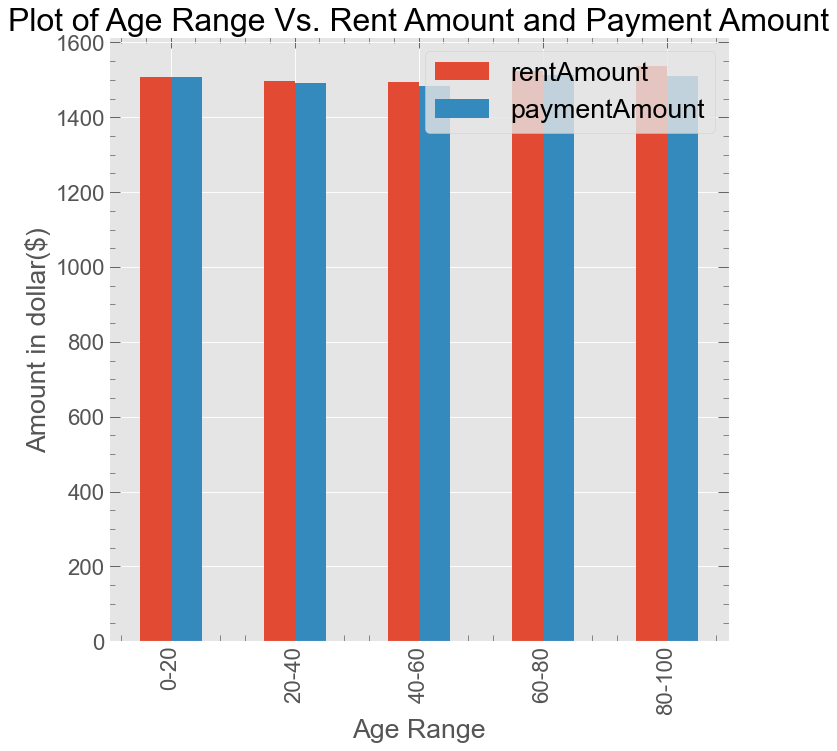

In [208]:
#Grouping by age range
rang=df_age.groupby(['ageRange'])["rentAmount", "paymentAmount"].mean().reset_index()
#Plotting both rent amount and payment amount with age
fig, ax = plt.subplots(figsize=(10,10))
rang.plot.bar(x="ageRange", y=["rentAmount", "paymentAmount"],ax=ax)
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Age Range")
plt.title("Plot of Age Range Vs. Rent Amount and Payment Amount", loc='center')
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.show()

# Statistical Relationship

In [45]:
#Correlation of all columns
corr=rent_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,houseID,houseZip,paymentAmount,rentAmount,age
houseID,1.000000,0.013022,0.007457,0.011433,0.022213
houseZip,0.013022,1.000000,0.006908,0.011810,0.033305
paymentAmount,0.007457,0.006908,1.000000,0.780516,0.018144
rentAmount,0.011433,0.011810,0.780516,1.000000,0.025071
age,0.022213,0.033305,0.018144,0.025071,1.000000


#### Correlation plots

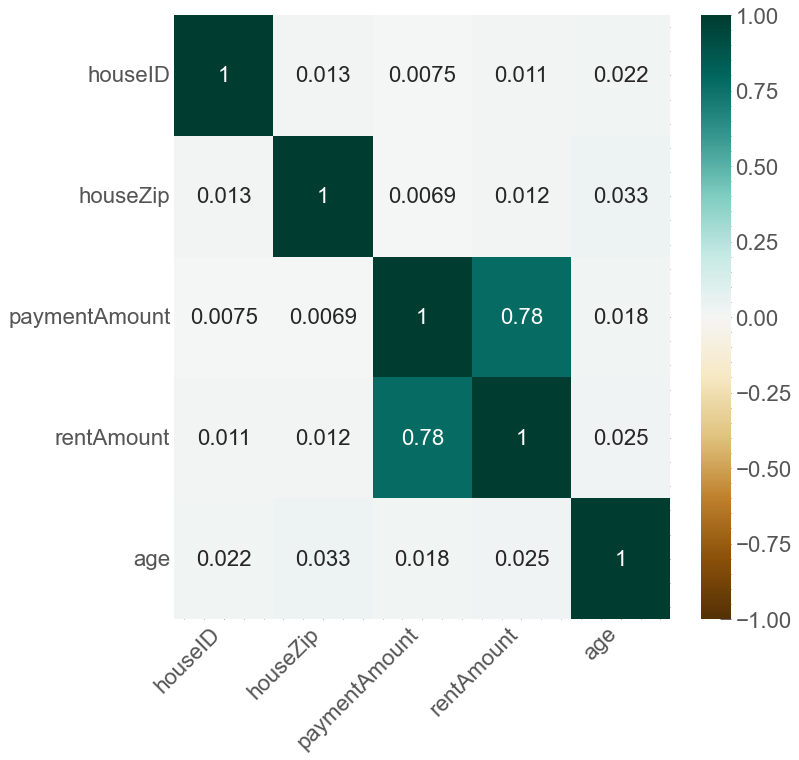

In [210]:
#Plotting using seaborn heatmap
fig, ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-1, vmax=1, ax=ax, cmap='BrBG',annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,
                       horizontalalignment='right')
#plt.savefig('static/Images/plot7',bbox_inches="tight")
plt.show()

In [169]:
# Calculating corrlelation using scipy stats
#Pearson Corrlelation coefficient
correlation=sts.pearsonr(rent_df['paymentAmount'], rent_df['rentAmount'])
correlation

(0.7805161251121622, 0.0)

### 2. Can you do a statistical hypothesis testing on this?
#### Does tenant’s age is related to the rent they pay?


### A. First defining the null and alternative hypothesis
##### Alternate hypothesis - Tenant’s age is not related to the rent they pay.
##### Null Hypothesis - Tenant’s age is related to the rent they pay.

### B. Setting the level of significance (alpha) to 0.05.

### C. Obtaining the p-value
##### P-value is the probalility of obtaining observed result of test assuming null hypothesis is correct
##### p-value less or equal to 0.05: Indicates strong evidence against the null hypothesis. So rejecting the null hypothesis.
##### p-value greater than 0.05: Indicates week evidence against the null hypothesis. So accepting the null hypothesis.

####  Used Independent T-Tests for obtaining p-value
##### Independent t-tests will compare the means of 2 independent populations. Assumptions

###### 1. Data is normally distributed
###### 2.Data is independent
###### 3. Data is homogenous (The standard deviations are roughly equal)

In [100]:
#Independent t-test
import scipy.stats as stats
stats.ttest_ind(df_age['age'], df_age['rentAmount'], equal_var=False)

Ttest_indResult(statistic=-820.5586594582867, pvalue=0.0)

### Since p-value less than 0.05 which indicates strong evidence against the null hypothesis. So rejecting the null hypothesis. 
## Tenant’s age is not related to the rent they pay.

## C. Is the payment amount always the same as the rent amount?
### Ans: The payment amount is differnt then the rent amount. 

In [39]:
#Making a seperate dataframe
df_payment=rent_df.copy()

In [115]:
# Defining a function to convert to differnt category based on payment amount and rent amount
def low_high_risk(x,y):
    if x==0.0:
        return "No Payment"
    elif x>y:
        return "Overdue Payment"
    elif x<y: 
        return "Balance Left"
    else:
        return "Actual Amount Paid"

In [116]:
#Adding a new column status with differnt category
df_payment['status']=df_payment.apply(lambda x: low_high_risk(x['paymentAmount'], x['rentAmount']), axis=1)

In [117]:
#Value counts of differnt category
df_payment['status'].value_counts()

Actual Amount Paid    52049
Overdue Payment        6603
Balance Left            591
No Payment              570
Name: status, dtype: int64

## 1. How many different situations are there if the payment is different? 

### As we can see there are four different situations if payment amount and rent amount is differnt:
#### 1. No payment with empty payment amount section
#### 2. More payment amount then rent amount (Over due because the payment date is always after the 10th of the month in this case)
#### 3. Negative payment amount which can be due to balance left after rent payment
#### 4. Actual payment amount

### 87% actual payment
### 1% missing payment
### 11% over due payment
### 1% Balance left

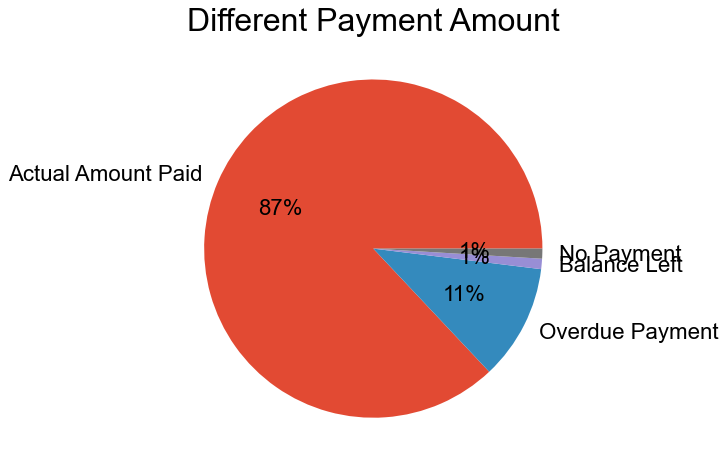

In [192]:
# Pie plot of different payment situations
plt.figure(figsize=(7,7))
labels=['Actual Amount Paid', 'Overdue Payment','Balance Left', 'No Payment' ]
df_payment['status'].value_counts().plot(kind='pie', autopct='%1.0f%%', label='')
plt.title("Different Payment Amount")
plt.savefig('static/Images/plot5',bbox_inches="tight")
plt.show()

### 2. What do you think is the reason for those over payment? Can you try to verify your guess?
#### Ans: Over payment always occur when the payment date is after the 10th of the month. Thats means the extra charge for not paying the rent in time.


In [70]:
#Filtering the dataframe with rent date greater then the 10th of month
over_paytment=rent_df.loc[rent_df['paymentDate'].apply(lambda x : x.day)>=10 ,['name','paymentDate','paymentAmount', 'rentAmount']]
over_paytment

,name,paymentDate,paymentAmount,rentAmount
16,Claretta Carasco,2011-04-11,1698.0,1544.0
23,Romana Buscher,2010-03-17,672.0,585.0
26,Enrique Wendell,2010-05-12,1661.0,1510.0
38,Nery Villafana,2012-03-16,2092.0,1902.0
52,Risa Gallaway,2012-03-14,2380.0,2164.0
...,...,...,...,...
59757,Sherly Mccutchen,2012-01-16,1554.0,1413.0
59770,Willard Dutremble,2011-10-11,1284.0,1168.0
59779,Marita Iannuzzi,2010-10-17,1969.0,1713.0
59780,Tomika Sylvestre,2010-07-12,1631.0,1483.0


### 3. What do you think is the reason for the missing payment? Can you try to verify your guess?
#### Ans: The reason of missing payment is when the renters were unable to pay the rent. 
####  Or it may be the case where payment amount is missing.


## Data visulization

### Payment amount column and rent amount columns are highly correlated.

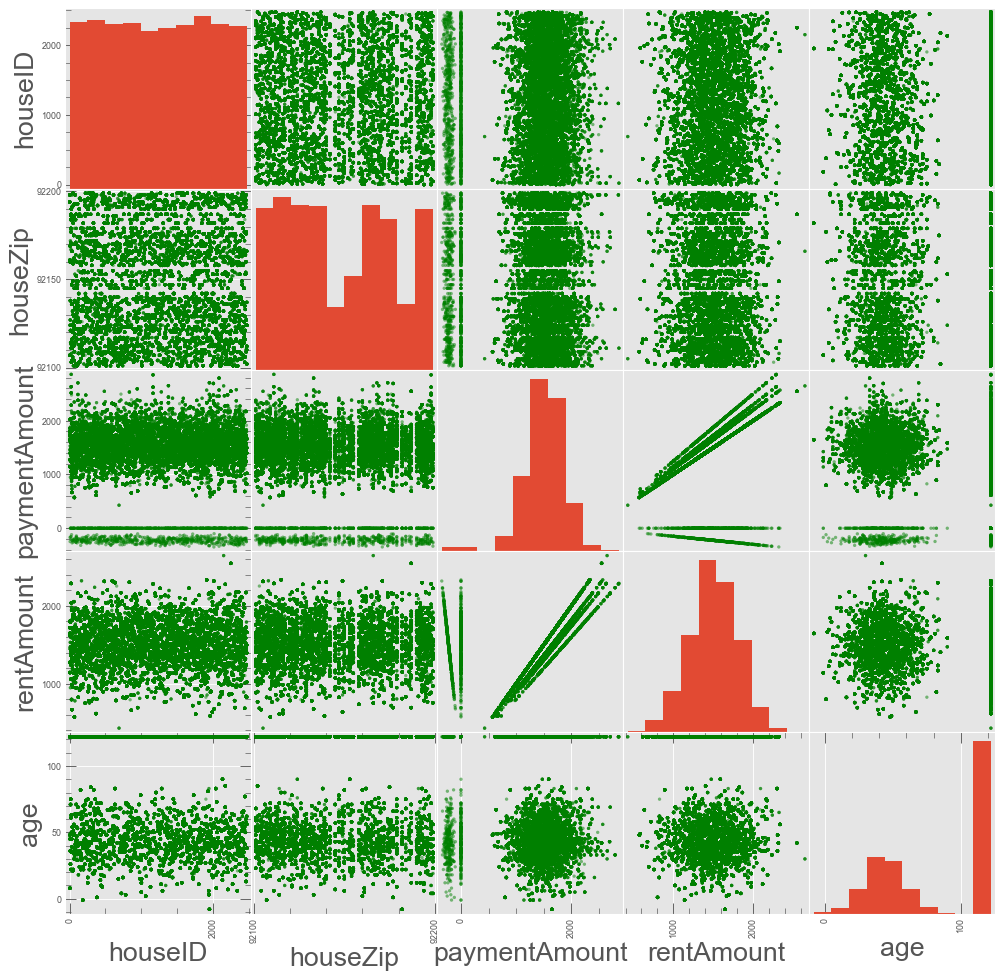

In [47]:
#Scatter matrix plot
pd.plotting.scatter_matrix(rent_df,c='g', figsize=(15,15))
plt.show()

## Plotting rent amount and payment amount.
#### Bell shaped curve with center of around 1500 dollar.

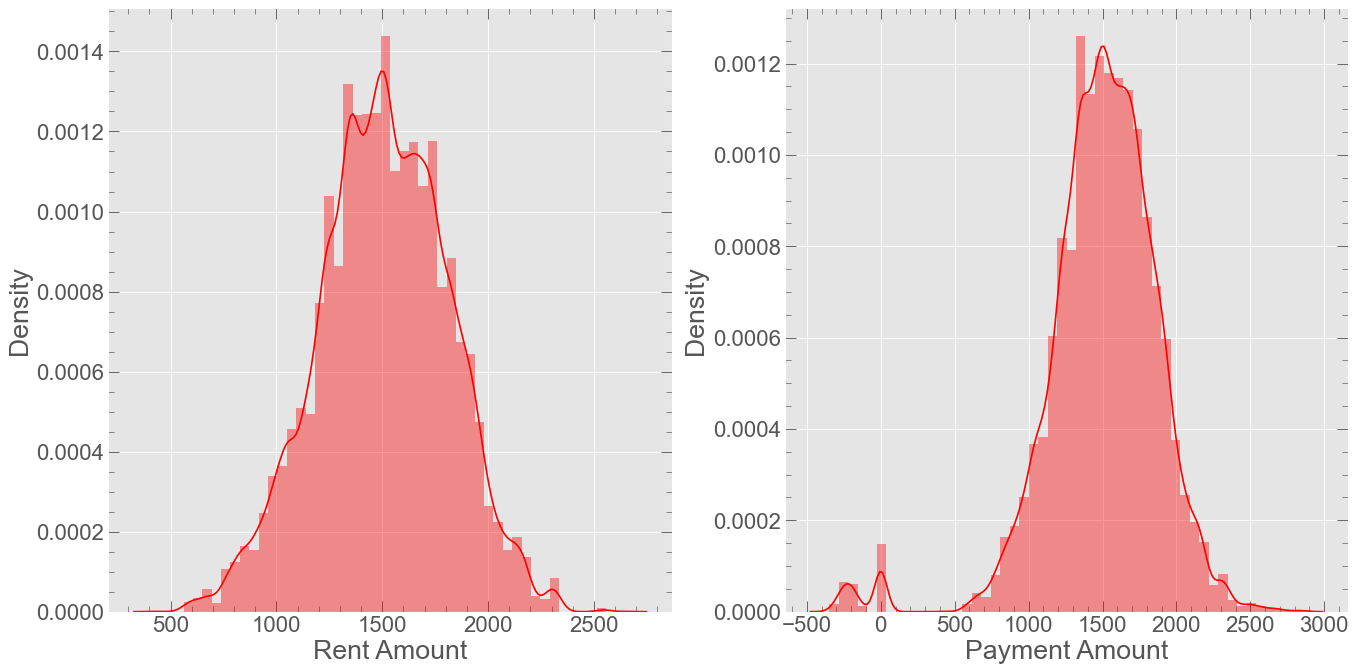

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(rent_df['rentAmount'],color='r',ax=ax1)
ax1.set_xlabel('Rent Amount')

sns.distplot(rent_df['paymentAmount'],color='r',ax=ax2)
ax2.set_xlabel('Payment Amount')
plt.show()

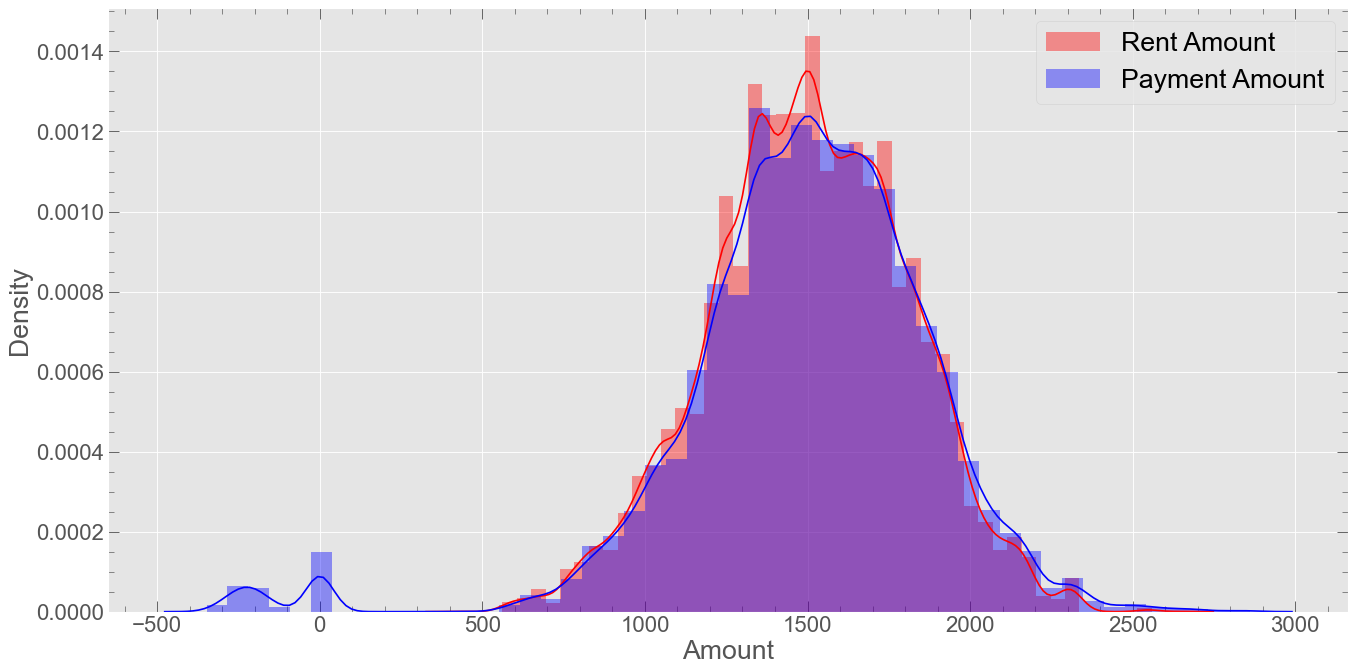

In [194]:
#Both plots in same plot
fig, ax = plt.subplots( figsize=(20,10))
sns.distplot(rent_df['rentAmount'],color='r',label="Rent Amount",ax=ax)
sns.distplot(rent_df['paymentAmount'],label="Payment Amount",color='b',ax=ax)
ax.set_xlabel('Amount')
#plt.savefig('static/Images/plot1',bbox_inches="tight")
ax.legend()
plt.show()

## Zipcode Vs. Rent and Payment Amount

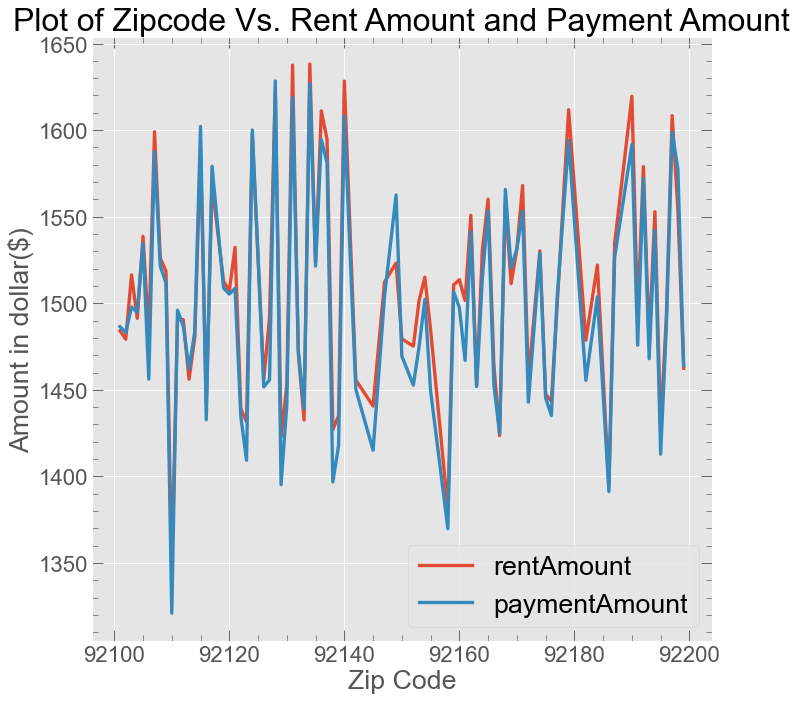

In [199]:
#Using groupby to group data according to zipcode
zip_df=rent_df.groupby('houseZip')['rentAmount', 'paymentAmount'].mean().reset_index()
#Plottinf the data
fig, ax = plt.subplots(figsize=(10,10))
zip_df.plot(x="houseZip", y=["rentAmount", "paymentAmount"],linewidth =3, ax=ax)
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Zip Code")
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.title("Plot of Zipcode Vs. Rent Amount and Payment Amount")
plt.show()

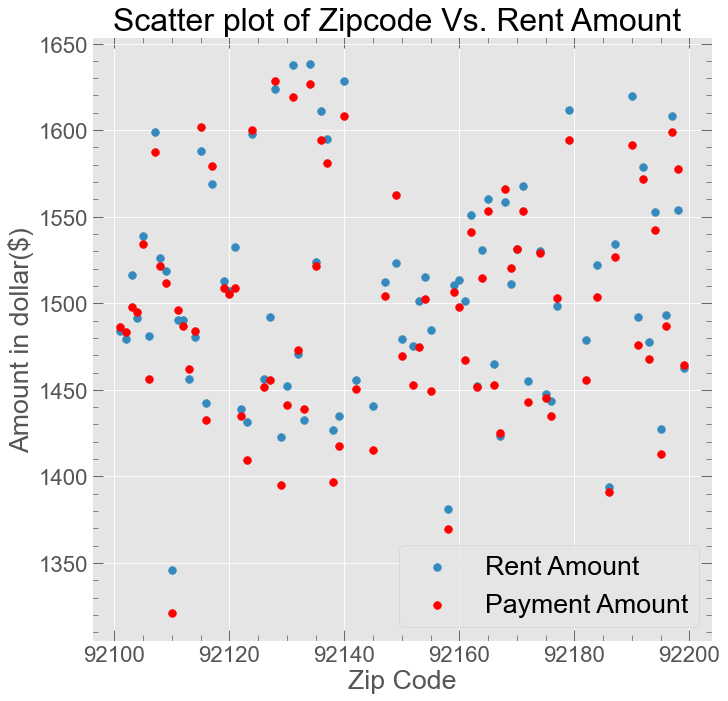

In [201]:

#Plottinf the data
fig, ax = plt.subplots(figsize=(10,10))
zip_df.plot.scatter(x="houseZip", y="rentAmount",s=50, ax=ax, label="Rent Amount")
zip_df.plot.scatter(x="houseZip", y="paymentAmount",s=50,c='r', ax=ax, label="Payment Amount")
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Zip Code")
plt.legend()
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.title("Scatter plot of Zipcode Vs. Rent Amount ")
plt.show()

### No relation between zipcode with payment amount and rent amount

## Box plot

In [61]:
#Top 20 zipcode with largest rent amount
top_rent=zip_df.nlargest(20, "rentAmount")
top_rent

,houseZip,rentAmount,paymentAmount
31,92134,1638.122047,1626.901870
28,92131,1637.563780,1618.923465
37,92140,1628.329655,1607.996207
25,92128,1623.532554,1628.422538
71,92190,1619.556643,1591.670839
66,92179,1611.763270,1594.106635
33,92136,1611.152518,1594.533094
78,92197,1608.354027,1598.793205
6,92107,1599.035191,1587.301173
22,92124,1597.831742,1600.108473


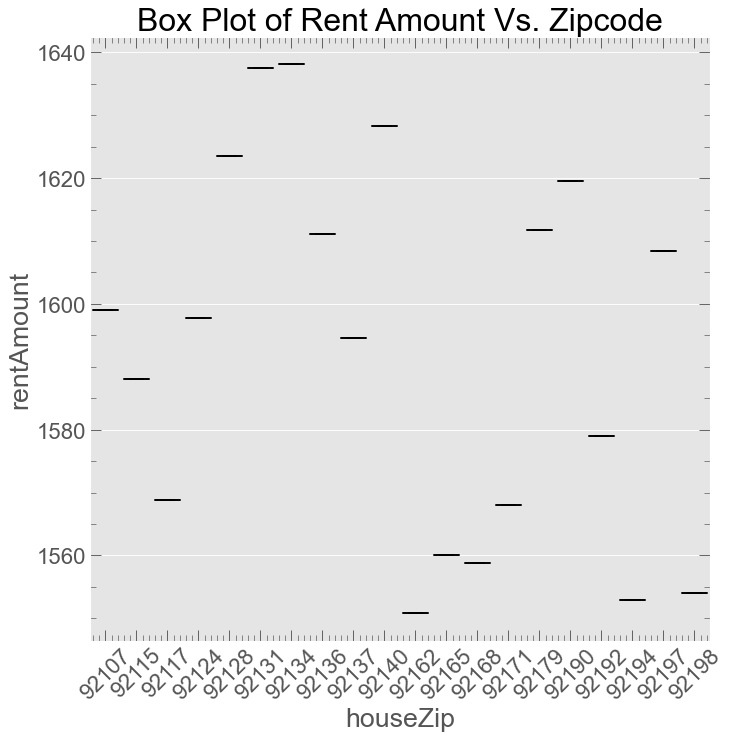

In [72]:
#Box plot of rent amount vs house zip.
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="houseZip", y="rentAmount",
        data=top_rent, color='k',ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Box Plot of Rent Amount Vs. Zipcode")
plt.xticks(rotation = 45)
plt.show()

## Payment Date Vs.Rent Amount and Payment Amount

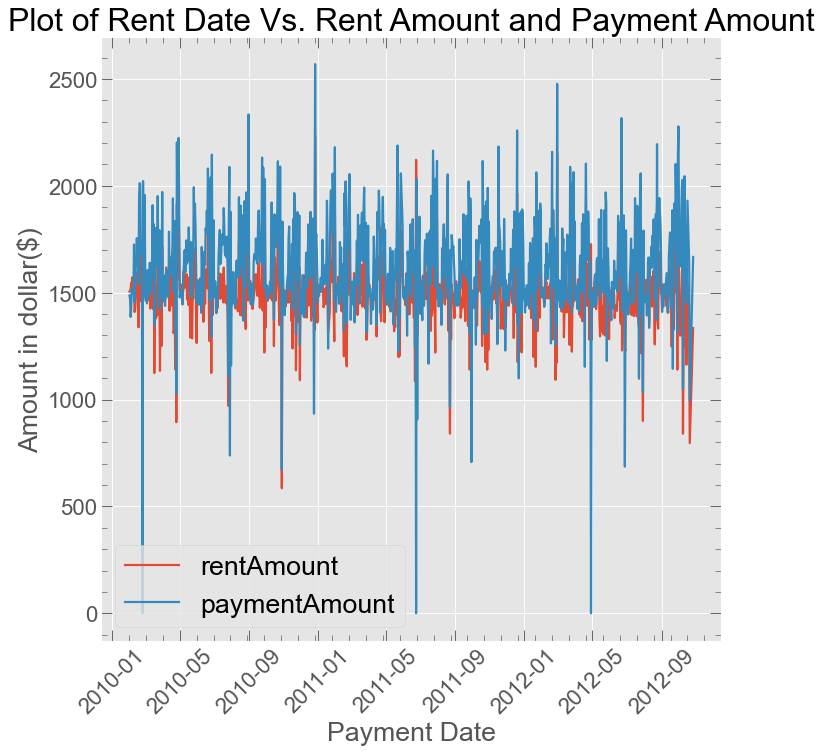

In [143]:
#Using group according to payment date
date_df=rent_df.groupby('paymentDate')['rentAmount', 'paymentAmount'].mean().reset_index()
#Plotting
fig, ax = plt.subplots(figsize=(10,10))
date_df.plot(x="paymentDate", y=["rentAmount", "paymentAmount"], linewidth=2, ax=ax)
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Payment Date")
plt.title("Plot of Rent Date Vs. Rent Amount and Payment Amount")
plt.xticks(rotation = 45)
plt.show()

## Whether the Tenants Paid on Time or Not

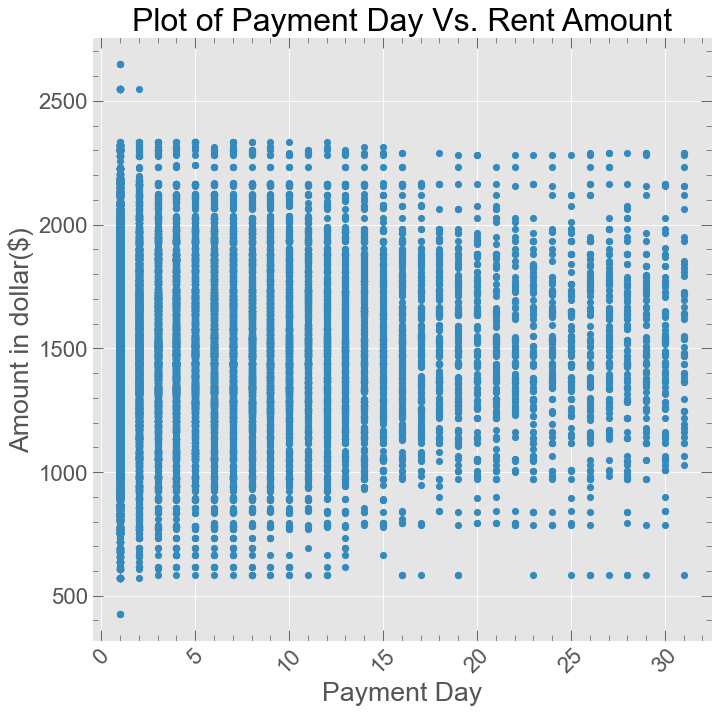

In [160]:
#Making new columns as payment day
day_df=rent_df.copy()
day_df['paymentDay']=pd.to_datetime(day_df['paymentDate']).dt.day
fig, ax = plt.subplots(figsize=(10,10))
day_df.plot.scatter(x="paymentDay", y="rentAmount", ax=ax)
ax.set_ylabel("Amount in dollar($)")
ax.set_xlabel("Payment Day")
plt.title("Plot of Payment Day Vs. Rent Amount")
plt.xticks(rotation = 45)
plt.show()

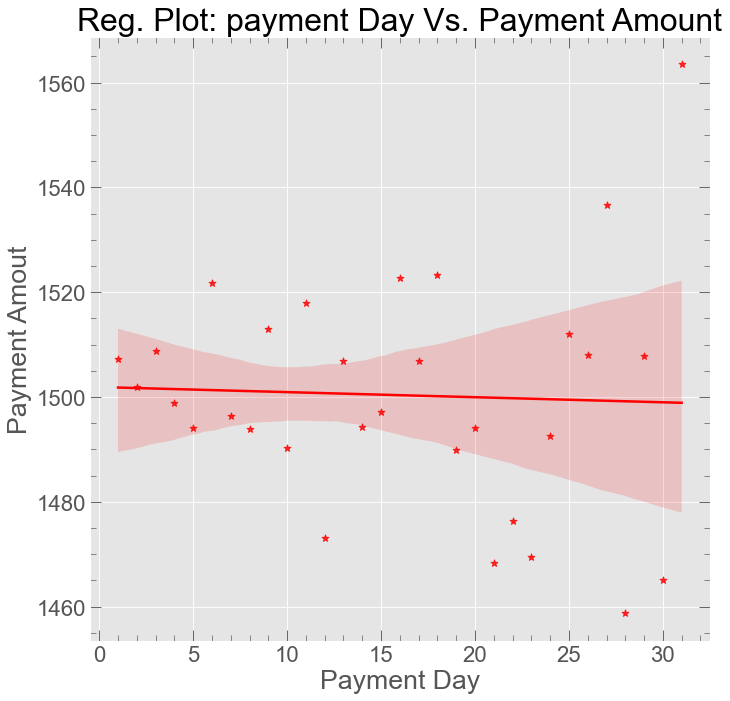

In [203]:
#using groupby on payment day
d_df=day_df.groupby('paymentDay')['rentAmount', 'paymentAmount'].mean().reset_index()
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="paymentDay", y="rentAmount",
           data=d_df,scatter_kws={'s':40},color='r',marker="*",ax=ax)
ax.set_xlabel('Payment Day')
ax.set_ylabel('Payment Amout')
ax.set_title('Reg. Plot: payment Day Vs. Payment Amount')
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.show()

## Payment after or before 10th of Month

In [150]:
binary_df=rent_df.copy()
binary_df['paymentDate']=pd.to_datetime(binary_df['paymentDate']).dt.date
# Defining a function to convert to 1 0r 0 if payment date is before or after 10 of month
def payment(x):
    if x.day>10:
        return 0
    else:
        return 1
# Applying the function
binary_df['paymentDate']=binary_df['paymentDate'].apply(payment)

In [151]:
# Target columns
binary_df['paymentDate'].value_counts()

1    55580
0     4233
Name: paymentDate, dtype: int64

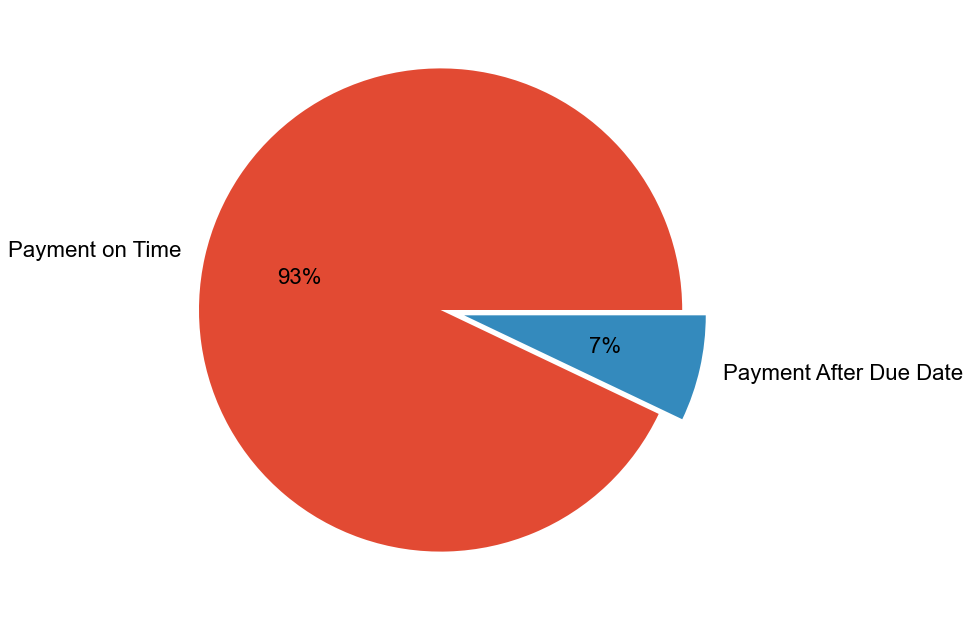

In [205]:
# Pie plot of different payment date
plt.figure(figsize=(10,10))
explode = (0, 0.1)
labels=['Payment on Time','Payment After Due Date' ]
binary_df['paymentDate'].value_counts().plot(kind='pie', explode =explode, labels=labels, autopct='%1.0f%%', label="")
#plt.savefig('static/Images/plot1',bbox_inches="tight")
plt.show()

## House ID and Rent Amount

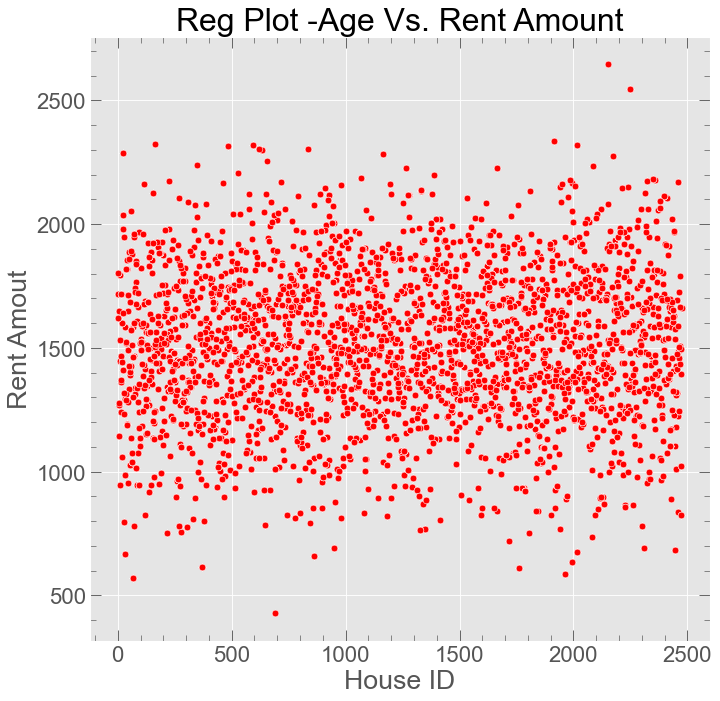

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='houseID', y='rentAmount',
           data=rent_df,color='r',marker="o",ax=ax)
ax.set_xlabel('House ID')
ax.set_ylabel('Rent Amout')
ax.set_title('Reg Plot -Age Vs. Rent Amount')
#ax.legend( loc='upper right',labels='paymentAmount')

plt.show()

# Updated Data with Additional Columns

## New Dataframe with lat, lng and other columns added from zipcode

In [54]:
# Reading the cleaned saved data 
added_df=pd.read_csv('Resources/Cleaned_data/clean_added_data.csv')

In [55]:
#looking the new dataframe with added columns
added_df.head()

,name,dob,houseID,houseZip,paymentDate,paymentAmount,rentAmount,age,city,county,lat,lng,housingUnits,occupiedHousingUnits,medianIncome,population,state
0,Karima Germany,1951-05-23,1192,92154,2011-11-01,1321.0,1321.0,71,San Diego,San Diego County,32.60,-117.00,21206.0,20202.0,57618.0,79708.0,CA
1,Agustina Spargo,1900-01-01,21,92111,2011-09-06,2289.0,2289.0,122,San Diego,San Diego County,32.82,-117.15,17268.0,16498.0,57350.0,45096.0,CA
2,Lucilla Broderick,1900-01-01,1474,92159,2011-11-01,1439.0,1439.0,122,San Diego,San Diego County,NaN,NaN,NaN,NaN,NaN,NaN,CA
3,Russ Mchale,1977-04-20,2015,92137,2012-07-01,1744.0,1744.0,45,San Diego,San Diego County,NaN,NaN,NaN,NaN,NaN,NaN,CA
4,Carmelita Ritzer,1969-03-09,311,92136,2011-02-01,1471.0,1471.0,53,San Diego,San Diego County,NaN,NaN,NaN,NaN,NaN,NaN,CA


In [56]:
#Shape of the dataframe before dropping nan
added_df.shape

(59813, 17)

In [57]:
#Droping all with Nan value
added_df.dropna(how="any", inplace=True)

In [58]:
#Shape of the dataframe after dropping nan
added_df.shape

(23903, 17)

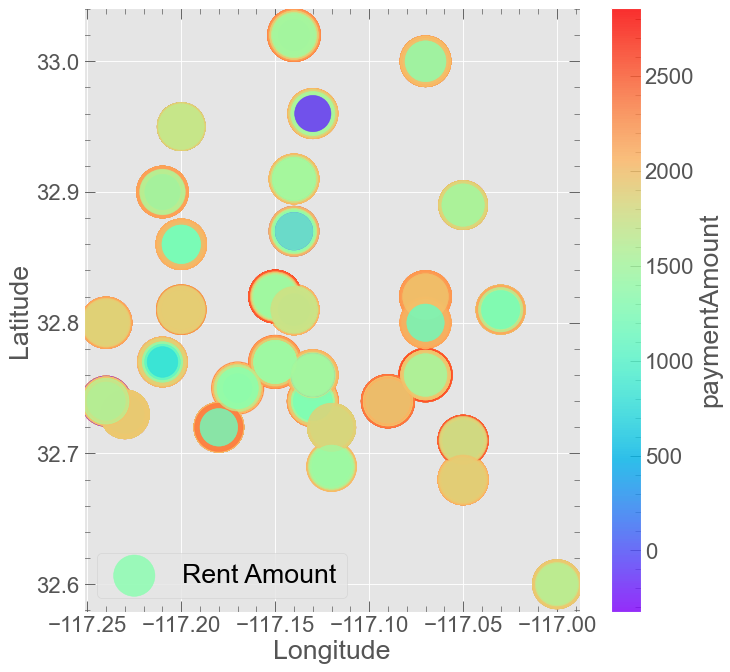

In [206]:
#Scattter plot
fig, ax = plt.subplots(figsize=(10,10))

added_df.plot(kind='scatter', x='lng', y='lat', alpha=0.8, 
        s=added_df['rentAmount'],label='Rent Amount',
         c='paymentAmount', cmap=plt.get_cmap('rainbow'),
        colorbar=True, ax=ax)

ax.set_title('')
ax.set(xlabel="Longitude", ylabel="Latitude")
plt.savefig('static/Images/plot9',bbox_inches="tight")
plt.show()

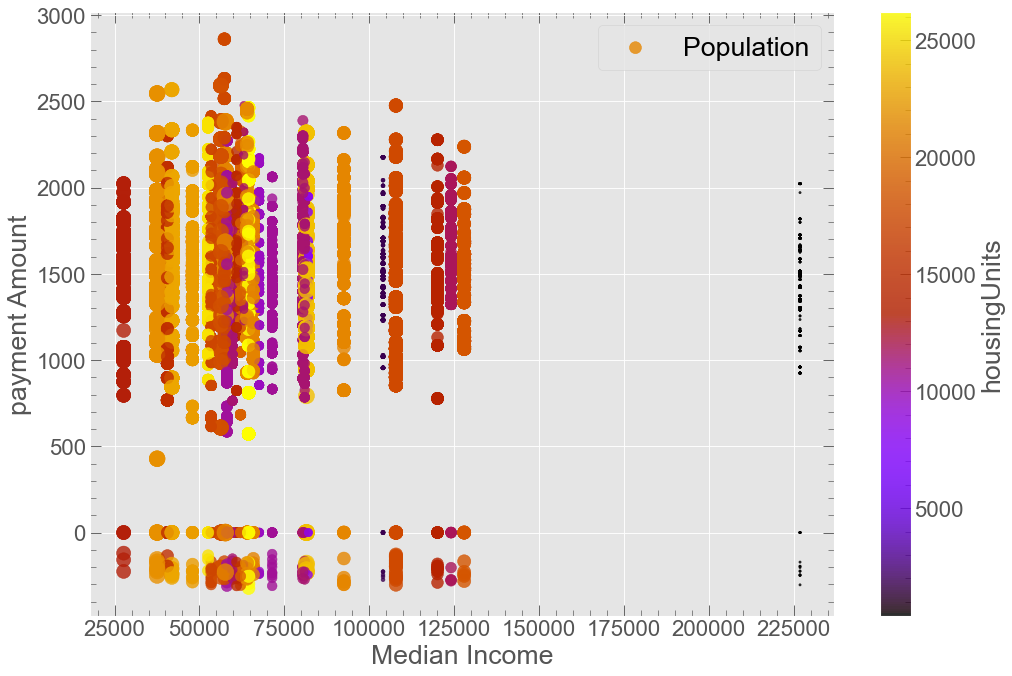

In [98]:
#Scatter plot
fig, ax = plt.subplots(figsize=(15,10))

added_df.plot(kind='scatter', x='medianIncome', y='paymentAmount', alpha=0.8, 
        s=added_df['population']/350,label='Population',
         c='housingUnits', cmap=plt.get_cmap('gnuplot'),
        colorbar=True, ax=ax)

ax.set_title('')
ax.set(xlabel="Median Income", ylabel="payment Amount")

plt.show()